## DATA TRAINING

In [5]:
import numpy as np
import pandas as pd
import math
import joblib

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("./urban-computing-bus/augmented_only.csv")
seed = 33
df

,time_Seconds,round_trip,stop,time,elapsed,lat,lon,next_stop
0,29937.0,NaN,5.0,8:18:57,34.0,18.403751,-66.046593,6.0
1,29960.0,NaN,6.0,8:19:20,23.0,18.403879,-66.048199,13.0
2,30010.0,NaN,13.0,8:20:10,50.0,18.403955,-66.049898,24.0
3,30037.0,NaN,24.0,8:20:37,27.0,18.404698,-66.050468,23.0
4,30078.0,NaN,23.0,8:21:18,41.0,18.406440,-66.050140,20.0
...,...,...,...,...,...,...,...,...
370,34969.0,1243.0,2.1,9:42:49,122.0,18.406243,-66.043161,1.0
371,35280.0,1497.0,1.0,9:48:00,311.0,18.407170,-66.041989,2.2
372,35436.0,1406.0,2.2,9:50:36,156.0,18.406243,-66.043161,3.0
373,35554.0,1438.0,3.0,9:52:34,118.0,18.404856,-66.044836,4.0


### Predicting time until next stop

In [11]:
#modify if necessary
sub = df[['stop','time_Seconds','elapsed']]
sub = df.dropna()



####
### Testing and training with dif files
####

training = pd.read_csv("./urban-computing-bus/augmented_only.csv")
testing = pd.read_csv("./urban-computing-bus/cleaned.csv")
sub_testing = testing[['stop','time_Seconds','elapsed']]
sub_testing = sub_testing.dropna()

sub_training = training[['stop','time_Seconds','elapsed']]
sub_training = sub_training.dropna()

X_train = sub_training[['stop','time_Seconds']]
y_train= sub_training['elapsed']

X_test = sub_testing[['stop','time_Seconds']]
y_test = sub_testing['elapsed']



Sample times


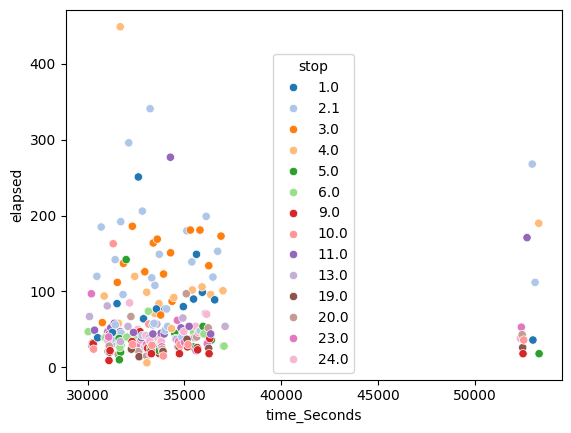

Predicted times


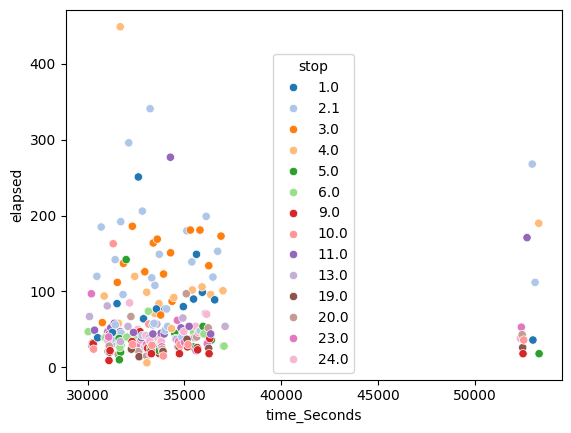

Differences between real and predicted times


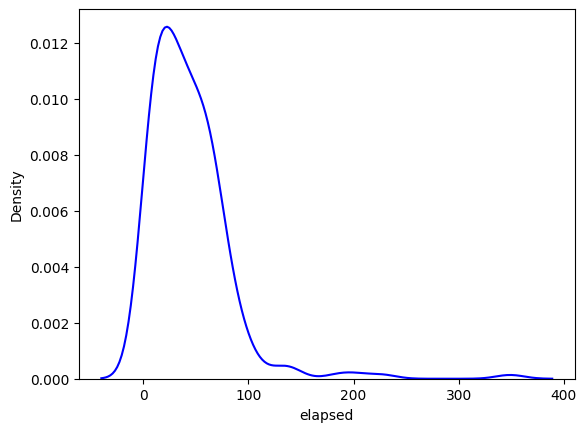

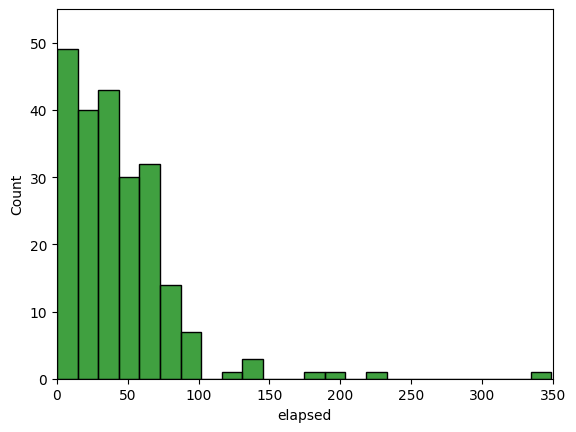

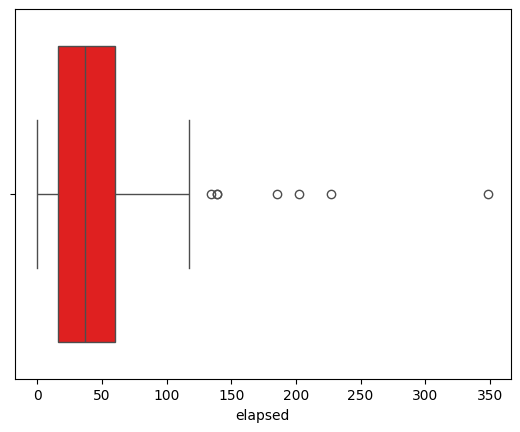

Statistical data
count    223.000000
mean      43.433413
std       39.386510
min        0.161568
25%       16.084768
50%       36.931321
75%       60.181207
max      348.830210
Name: elapsed, dtype: float64


In [12]:

reg = LinearRegression().fit(X_train, y_train)

y_pred = reg.predict(X_test)

#Graph results
pred = X_test
dat = X_test
pred['elapsed']=y_pred
dat['elapsed']=y_test

print("Sample times")
sns.scatterplot(data=dat,x='time_Seconds',y='elapsed',hue='stop',palette="tab20")
plt.show()

print("Predicted times")
sns.scatterplot(data=pred,x='time_Seconds',y='elapsed',hue='stop',palette="tab20")
plt.show()

print("Differences between real and predicted times")

dif = np.abs(y_test - y_pred)
sns.kdeplot(x=dif, color='blue')
plt.show()

sns.histplot(x=dif,color='green')
plt.xlim(0,350)
plt.ylim(0,55)
plt.show()

sns.boxplot(x=dif,color='red')
plt.show()

print("Statistical data")
print(pd.Series(dif).describe())

Sample times


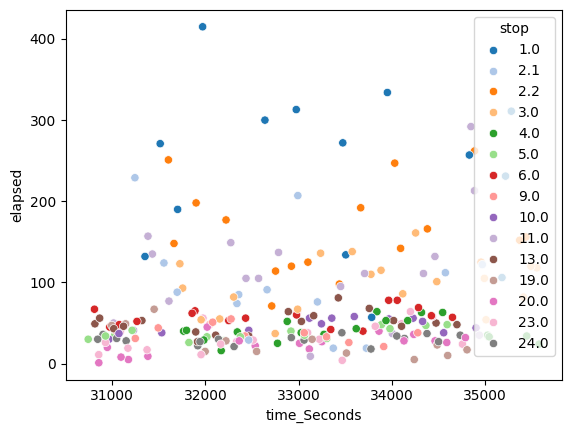

Predicted times


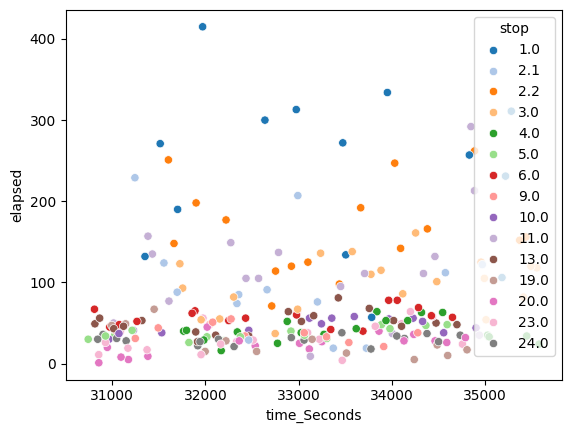

Differences between real and predicted times


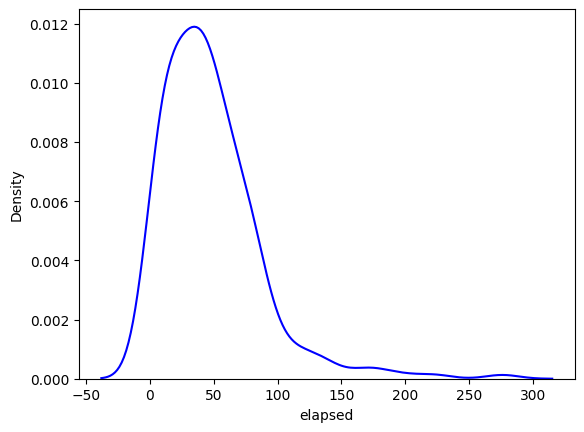

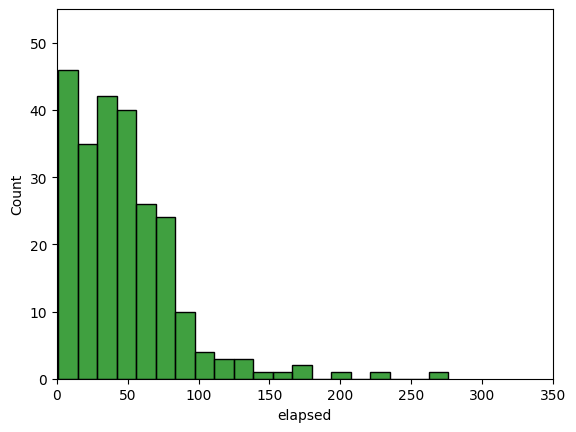

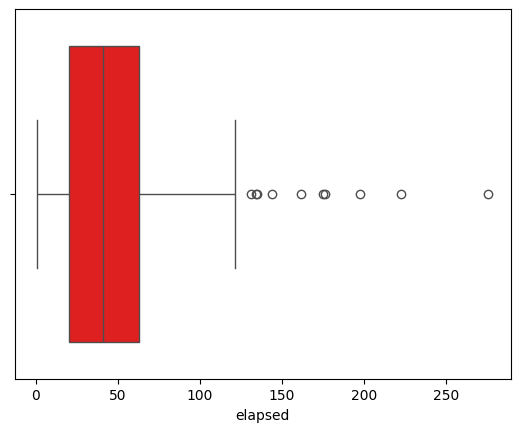

Statistical data
count    240.000000
mean      47.628257
std       39.020874
min        1.060022
25%       20.424483
50%       41.135795
75%       63.150622
max      275.997579
Name: elapsed, dtype: float64


In [13]:

X = sub[['stop','time_Seconds']]
y = sub['elapsed']

#Linear Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=seed)

reg = LinearRegression().fit(X_train, y_train)

y_pred = reg.predict(X_test)

#Graph results
pred = X_test
dat = X_test
pred['elapsed']=y_pred
dat['elapsed']=y_test

print("Sample times")
sns.scatterplot(data=dat,x='time_Seconds',y='elapsed',hue='stop',palette="tab20")
plt.show()

print("Predicted times")
sns.scatterplot(data=pred,x='time_Seconds',y='elapsed',hue='stop',palette="tab20")
plt.show()

print("Differences between real and predicted times")

dif = np.abs(y_test - y_pred)
sns.kdeplot(x=dif, color='blue')
plt.show()

sns.histplot(x=dif,color='green')
plt.xlim(0,350)
plt.ylim(0,55)
plt.show()

sns.boxplot(x=dif,color='red')
plt.show()

print("Statistical data")
print(pd.Series(dif).describe())

In [3]:
#save model
joblib.dump(reg,"model.pkl")

['model.pkl']